In [1]:
import geopandas as geopd
import pandas as pd
import numpy as np

In [3]:
# Portugal municipalities and district shapefiles
# Original file source: https://forest-gis.com/shapefiles-de-portugal/
# Files shared on Slack: https://omdenalisbon-drb7115.slack.com/archives/C05508H78CW/p1683560515379459
df = geopd.read_file("../../data/PRT_adm/PRT_adm2.shp")

In [20]:
# Dataset containing energy demand (real consumption & nightlight) at municipality level
# Files shared on Slack: https://omdenalisbon-drb7115.slack.com/archives/C055XAHS4D8/p1684685557762119
df2 = pd.read_excel("../../data/task2/energy_demand_306.xlsx")
df2.drop(columns=["Geometry"], inplace=True)

In [24]:
# Merge shapefile data with energy demand info
df = df[["geometry", "ID_2"]].merge(df2, how='left', left_on="ID_2", right_on="Municipality_id")
del(df2)

In [26]:
# Portugal district shapefile
df2 = geopd.read_file("../../data/PRT_adm/PRT_adm1.shp")

### Auxiliary plotting functions

In [40]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.cm import ScalarMappable

def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

def plotShapeContour(shape, color="black", linewidth=.3):
    if shape.geom_type == "MultiPolygon":
        for geom in shape.geoms:
            x, y = geom.exterior.xy
            plt.plot(x,y,c=color,linewidth=linewidth)
    elif shape.geom_type == "Polygon":
        x,y = shape.exterior.xy
        plt.plot(x,y,c=color,linewidth=linewidth)

def plotShapeFill(shape, color):
    if shape.geom_type == "MultiPolygon":
        for geom in shape.geoms:
            x, y = geom.exterior.xy
            plt.fill(x, y, alpha=1, c=color, ec='none')
    elif shape.geom_type == "Polygon":
        x,y = shape.exterior.xy
        plt.fill(x, y, alpha=1, c=color, ec='none')

### Plot energy demand using nightlight

C:\Users\Catalin\AppData\Local\Temp\ipykernel_29184\2858374764.py:34: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(cmappable, aspect=30)


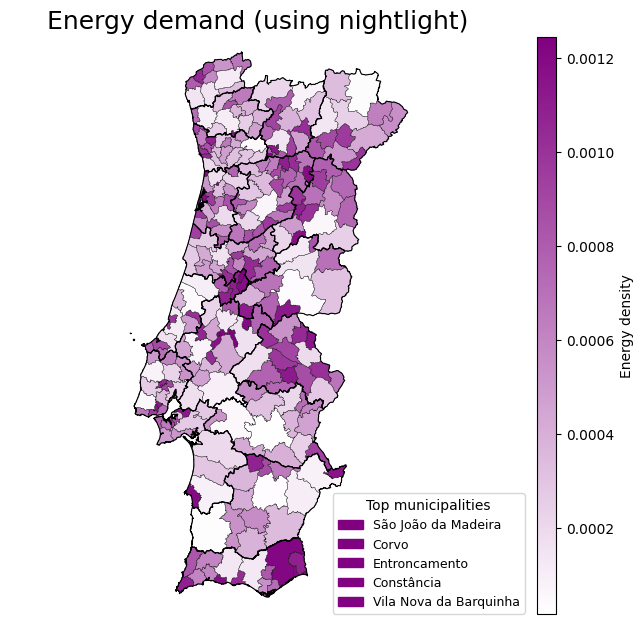

In [49]:
# color fader init
# uses colorFader function to create n colors ranging from c1 (purple) to c2 (white)
c1='purple'
c2='white'
n=df.shape[0]

fig, ax = plt.subplots(figsize=(8, 7.5))

plt.xlim([-11, -5])
plt.ylim([36.8, 42.3])
plt.axis("off")

# plot municipality contours
for _, row in df.iterrows():
    plotShapeContour(row["geometry"], linewidth=.2)

# plot districts countours
for _, row in df2.iterrows():
    plotShapeContour(row["geometry"], linewidth=.8)

# color municipalities according to data values (energy_density) from largest to smallest
i=0
handles=[]
for j, row in df.sort_values(by="energy_density", ascending=False).iterrows():
    plotShapeFill(row["geometry"], color=colorFader(c1,c2,i/n))
    if i<5:
        handles.append(mpatches.Patch(color=colorFader(c1,c2,i/n), label=df.at[j,"Municipality_name"]))
    i+=1

# colorbar
cmap = LinearSegmentedColormap.from_list("Custom", [c2, c1])
norm = mpl.colors.Normalize(vmin=df["energy_density"].min(), vmax=df["energy_density"].max())
cmappable = ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(cmappable, aspect=30)
cbar.set_label('Energy density')

# legend
plt.legend(handles=handles, loc="lower right", title="Top municipalities", bbox_to_anchor=(1.05, -0.01), fontsize=9)

plt.title("Energy demand (using nightlight)", size=18)
plt.savefig('energy_demand_1.png', bbox_inches='tight', dpi=300)
plt.show()

C:\Users\Catalin\AppData\Local\Temp\ipykernel_29184\3397612194.py:34: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(cmappable, aspect=30)


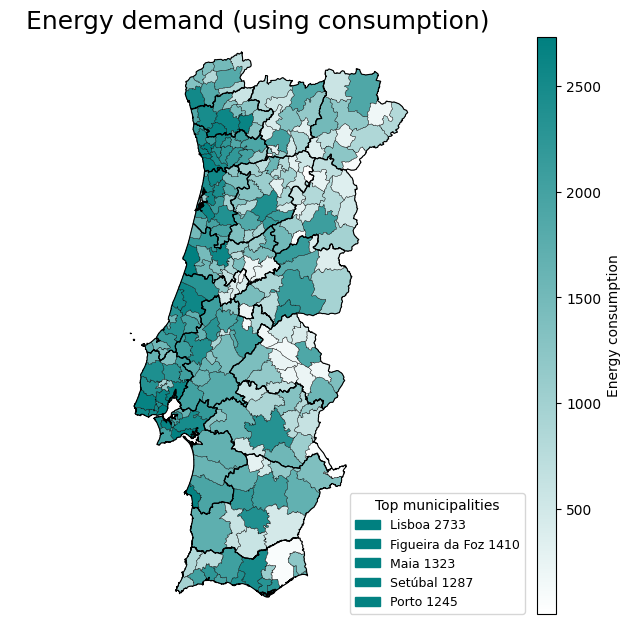

In [50]:
# color fader init
# uses colorFader function to create n colors ranging from c1 (teal) to c2 (white)
c1='teal'
c2='white'
n=df.shape[0]

fig, ax = plt.subplots(figsize=(8, 7.5))

plt.xlim([-11, -5])
plt.ylim([36.8, 42.3])
plt.axis("off")

# plot municipality contours
for _, row in df.iterrows():
    plotShapeContour(row["geometry"], linewidth=.2)

# plot districts countours
for _, row in df2.iterrows():
    plotShapeContour(row["geometry"], linewidth=.8)

# color municipalities according to data values (Consumo) from largest to smallest
i=0
handles=[]
for j, row in df.sort_values(by="Consumo", ascending=False).iterrows():
    plotShapeFill(row["geometry"], color=colorFader(c1,c2,i/n))
    if i<5:
        handles.append(mpatches.Patch(color=colorFader(c1,c2,i/n), label=df.at[j,"Municipality_name"] + " " + str(int(df.at[j,"Consumo"]))))
    i+=1

# colorbar
cmap = LinearSegmentedColormap.from_list("Custom", [c2, c1])
norm = mpl.colors.Normalize(vmin=df["Consumo"].min(), vmax=df["Consumo"].max())
cmappable = ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(cmappable, aspect=30)
cbar.set_label('Energy consumption')

# legend
plt.legend(handles=handles, loc="lower right", title="Top municipalities", bbox_to_anchor=(1.05, -0.01), fontsize=9)

plt.title("Energy demand (using consumption)", size=18)
plt.savefig('energy_demand_2.png', bbox_inches='tight', dpi=300)
plt.show()